# Numpy



In [ ]:
"relancez cette cellule quand vous voulez repartir de zéro"
%reset -f
import numpy as np

## Qu'est-ce?

Les listes python sont extensibles à volonté et peuvent contenir n'importe quoi. On les crée avec des crochets:

    `uneListe=['a',3,'toto']`
    
Dans un cadre scientifique, pour des questions de performance, on travaille plutôt avec des tenseurs `numpy`. Ce sont:

* des tableaux multi-dimensionnels
* de taille fixée
* qui ne peuvent contenir qu'un seul type d'objet : `int` ou `float` (numpy gère d'autres types, mais on ne les utisera pas)
* rapidement manipulables dans leur ensemble (grace à des "boucles implicites")

L'ordre ou la dimension d'un tenseur, c'est son nombre d'indices:
* tenseur de dimension 0 = un scalaire
* tenseur de dimension 1 = vecteur, ex: pour stocker du son
* tenseur de dimension 2 = matrice, ex: pour stocker une image
* tenseur de dimension 3 = volume, ex: pour stocker une vidéo
* tenseur de dimension 4 = très utile quand on fait du deep-learning sur des images


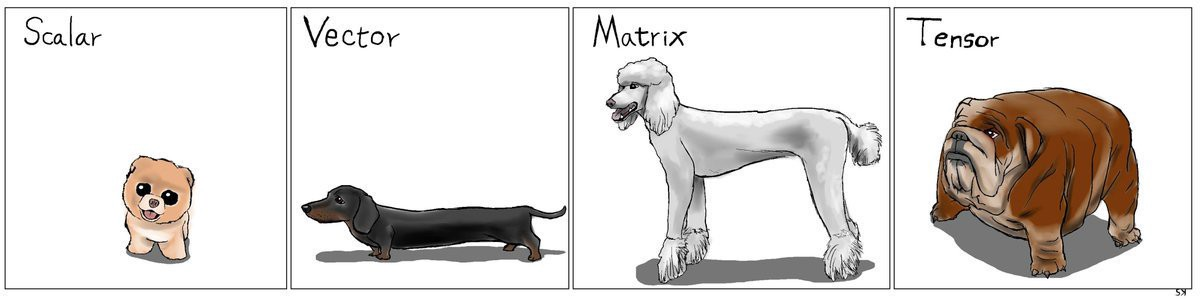

On précise l'affichage des tableaux numpy :

* 3 décimales après la virgule
* on supprime la notation scientifique des nombres
* on veut de grandes lignes


In [ ]:
np.set_printoptions(precision=3,suppress=True,linewidth=5000)

## Type des données

Voici les principaux dtypes (=data-types) que l'on rencontre:

* `np.float64`= flottant sur 64 bits: c'est le dtype par défaut pour stocker des valeurs réelles.
* `np.int64`= entier signé sur 64 bits:  c'est le dtype par défaut pour stocker des valeurs entières.
* `np.uint8`= entier positif (unsigned) sur 8 bits:  on les obtient quand on importe  des images `png` ou `jpeg`. Les pixels prennent des valeurs de 0 à 255.
* `np.float32`, `np.int32`: la bibliothèque `tensorflow` qui permet de faire du deeplearning est par défaut sur 32 bits.

### Tableaux de flottants

In [ ]:
"""un vecteur initialisé par une liste de valeurs. """
vec=np.array([1.,2,3,4])
"""une matrice"""
mat=np.array([ [1.,2,0],[3,4,0]])
"notez qu'on a mis au moins un coefficient flottant (avec un point)"

print("vec\n",vec)
print("mat\n",mat)

Les principales caractéristiques d'un tableau sont:

* `dtype` = data-type
* `shape` = sa forme

In [ ]:
print("vec:",vec.dtype,vec.shape)
print("mat:",mat.dtype,mat.shape)

In [ ]:
"""vecteur de flotant initialisé à 0, matrice de flottant initialisé à 1"""
vec_zero=np.zeros(shape=[5])
mat_un=np.ones(shape=[5,4])
print("\n vec_zero\n",vec_zero)
print("\n mat_un \n",mat_un)

### Tableaux d'entiers

Attention, depuis python 3, les indices de tableaux doivent nécessairement être des entiers. Par exemple `vecteur[3.]` renvoie une erreur.  

Du coup, si l'on veut faire un tableau qui contient plusieurs indices, il faut créer un tableau d'entiers. C'est quasiment le seul cas où l'on va utiliser de tels tableaux.

In [ ]:
indices=np.array([0,3,1])
vec = np.array([0.,2,4,6,8,10])
print(indices)
print(indices.dtype)
print(vec[indices])

### Convertion

In [ ]:
"""convertissons"""
vec=np.array([1.5,-2.5,3.5,4.5])

for dtype in [np.float32,np.int32,np.uint8]:
    vec_=vec.astype(dtype)
    print(f"{vec_} of type {dtype}")

Le `254` est très bizarre. C'est parce qu'avec les entier numpy, on travaille "modulo". En `uint8`, c'est modulo `256`  

#### →♡

Complétez ci-dessous le programme avec la contrainte: les nombres que vous écrirez dans `numbers` doivent être de plus en plus grand

In [ ]:
numbers=[-10,-5,...,0,  254, ...]
assert tuple(numbers)==tuple(sorted(numbers))

A=np.array(numbers)
A.astype(np.uint8)

    array([246, 251, 255,   0, 254, 255,   0,  10], dtype=uint8)

## Opérations élément par élément

La plupart des opérations sur les tenseurs se font élément par élément à l'aide d'une bouce implicite très rapide. Par exemple `tenseur1 * tenseur2` effectue la multiplication terme à terme (et non pas une multiplication matricielle).



### Exemples

In [ ]:
"""toutes ces opérations sur les tenseurs sont faites terme à terme."""

vec = np.array([1., 2, 3, 4])
vec_carre = vec**2
vec2= vec+vec_carre
vec3=7*vec
vec4=np.sin(vec)
vec5=vec2*vec3


print("vec",vec)
print("vec_carre",vec_carre)
print("vec2",vec2)
print("vec3",vec3)
print("vec4",vec4)
print("vec5",vec5)

Voici un exemple très classique d'utilisation d'une fonction numpy:

In [ ]:
import matplotlib.pyplot as plt
x=np.linspace(0,60,1000)
y=np.sin(x)
plt.plot(x,y);

### Performances

Comparons les performances entre une boulce implicite et une boucle explicite

In [ ]:
a=np.random.randint(0,100,size=1_000_000)
b=np.random.randint(0,100,size=1_000_000)

In [ ]:
%%time
"""
%%time: Pour calculez le temps d'une cellule entière
%time: Pour calculez le temps d'une ligne de code
"""
"boucle implicite"
c=a*b
print("premières valeurs:\n",c[:10])

In [ ]:
%%time
c=np.empty(len(a))
"boucle explicite"
for i in range(len(a)):
  c[i]=a[i]*b[i]
print("premières valeurs:",c[:10])

### Numpy effectue des copies...

La plupart des fonctions numpy ne modifient pas l'argument de départ: une 'copie' est faite.

In [ ]:
vec=np.array([1., 2, 3, 4])
vec1=vec**2
vec2=np.sin(vec)

print(vec1)
print(vec2)

"""vec n'a pas changé"""
print("vec",vec)

### ... mais pas toujours



***Attention :*** Le programme suivant montre que l'opération `*=` est faite "inplace" (=dans le même espace mémoire).

In [ ]:
v=np.ones([5])

def change(vec):
    #opération inplace
    vec*=2

change(v)
print(v)

Alors que:

In [ ]:
v=np.ones([5])

def change_pas(vec):
    #une copie  est faite
    vec=vec*2

change_pas(v)
print(v)

***A vous:*** Cela semble naturel que le programme précédent ne change pas le vecteur `v` car la variable locale s'appelle `vec`. Mais le programme suivant ne change pas `v` non plus:

    



In [ ]:
v=np.ones([5])
def change_pas_non_plus(v):
    v=v*2
change_pas_non_plus(v)
print(v)

Car la variable locale `v` n'est pas la variable globale `v`.



La notion de copie versus référence est une des grande difficultés de l'informatique. On aura l'occasion d'en parler. Certains langages (matlab,R), pour contourner ce problème, font des copies presque systématiques.  Mais cela engendre des problèmes de performance.

### Syntaxe objet ou fonctionnelle

De nombreuses fonctions numpy peuvent s'utiliser avec deux syntaxes différentes :
        
1. `np.fonction(tenseur)`
        
2. `tenseur.fonction()`

Et même dans le second cas, une copie du tenseur est faite ; c'est un peu trompeur car la syntaxe objet `tenseur.fonction()` suggère en général une opération modifiant l'objet (opération "inplace").

In [ ]:
vec = np.array([1.1234, 2.1234, 3.1234, 4.1234])

"""arrondir"""
vec1= np.round(vec,1)
"""idem avec syntaxe différente"""
vec2= vec.round(1)

print("vec1", vec1)
print("vec2", vec2)

"""vec n'a pas changé (cependant il ne s'affiche qu'avec 3 décimales à cause de notre entête)"""
print("vec", vec)

### Les fonctions à gogo $\triangleright$



En observant les graphique, vous pourrez remettre la liste de fonction ci-dessous dans le bon ordre:

    funcs=[np.cos,,np.tan,np.sign,np.sin,np.log,np.floor,np.tanh,np.arctan,np.ceil]


#### →♡♡♡

In [ ]:
import matplotlib.pyplot as plt

funcs=[
ni=len(funcs)
fig,axs=plt.subplots(ni,1,sharex="all",figsize=(6,ni))
x=np.linspace(-4,4,600)
for i,func in enumerate(funcs):
    axs[i].plot(x,func(x))
    axs[i].axvline(0,color="k",linestyle=":")
    axs[i].axhline(0,color="k",linestyle=":")

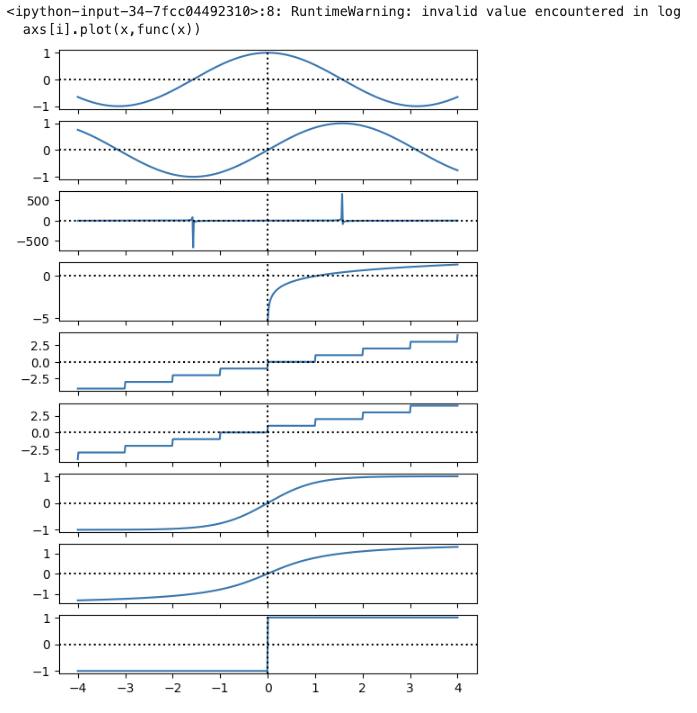

### `arctan2`

Retenez aussi une fonction particulière : `np.arctan2(y,x)` qui permet de renvoyer l'angle alpha du point de coordonnées (x,y).


In [ ]:
theta=np.arange(0,3,0.2)
theta

In [ ]:
x=np.cos(theta)
y=np.sin(theta)
plt.plot(x,y,".");

#### →♡

In [ ]:
theta_back=np...
theta_back

    array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8])

## Jouer avec les axes

Pour les tenseurs de dimension $\geq 2$, on peut faire des opérations en suivant un axe donné. Commençons par observer cela sur des matrices (dim=2).

### Lignes et colonnes

La convention pour numéroter les lignes et les colonnes est la même qu'en mathématiques.

In [ ]:
mat=np.array([[1,2,3],[-1,-2,-3]])
print(mat)

In [ ]:
"on ajoute des étiquettes pour clarifier. On utilise la bibliothèque pandas pour cela."
import pandas as pd
df=pd.DataFrame(mat,index=["i=0","i=1"],columns=["j=0","j=1","j=2"])
df

In [ ]:
print("sum_ij mat[i,j]:\n",np.sum(mat))
print("sum_i mat[i,j]:\n",np.sum(mat,axis=0))
print("sum_j mat[i,j]:\n",np.sum(mat,axis=1))

In [ ]:
v1=np.array([10,20,30])
v2=np.array([100,200,300])
print("empilons le long de i:\n",np.stack([v1,v2],axis=0))
print("empilons le long de j:\n",np.stack([v1,v2],axis=1))

In [ ]:
mat=np.array([[1,2,3],[-1,-2,-3]])
print("mat:\n",mat)
mat2=np.array([[10,20],[30,40]])
print("mat2:\n",mat2)
print("concaténons:\n",np.concatenate([mat,mat2],axis=1))

Dans l'exemple précédent, on n'aurait pas pu concaténer avec `axis=0`. On aurait eu le message d'erreur: *all the input array dimensions except for the concatenation axis must match exactly*.

In [ ]:
print("max_j mat[i,j]:\n",np.max(mat,axis=1))
print("argmax_j mat[i,j]:\n",np.argmax(mat,axis=1))

Attention, quand on ne précise pas les axes, l'opération par défaut n'est pas toujours très claire: c'est parfois `axis=0` ou c'est parfois "selon tous les axes" comme `np.sum` ou `np.max`

### Reshape

In [ ]:
a=np.arange(0,12)# presque comme range(0,12)
print("a:\n",a)
print("a.reshape([2,6]):\n",a.reshape([2,6]))
"le -1 signifie: 'adapte la dimension' "
print("a.reshape([2,-1)]):\n",a.reshape([2,-1]))
print("a.reshape([2,2,3]):\n",a.reshape([2,2,3]))

In [ ]:
mat=np.array([[1,2,3],[-1,-2,-3]])
print("mat:\n",mat)
print("mat:\n",mat.reshape([-1]))#on aurait pu préciser [6]

### Broadcasting  

Le broadcasting, c'est le fait de faire des opérations entre tenseurs de shape différentes. C'est une opération que l'on fait naturellement en math, par exemple quand on écrit:
$$
w[i,j] =  mat[i,j] \, vec[j]
$$

Le prochain TP est entièrement consacré au broadcasting.

## Modifier un tenseur



### Directement

In [ ]:
vec = np.array([1., 2, 3, 4])
mat = np.array([[1., 2], [3, 4]])

"""modifions un élément"""
vec[0] = 10.  # la numérotation commence à zéro
mat[1, 1] = 10.

""" attention, on a ainsi modifié les objets initiaux"""
print("vec et mat après modification")
print(vec)
print(mat)

In [ ]:
"""modifions un bloc d'éléments"""
vec_zero = np.zeros(shape=[5])
vec_zero[0:3]=5 # [0:3] indique les indices dans l'intervalle [0,3[

mat_un = np.ones(shape=[5, 4])
mat_un[0:2,0:3]=7

print("\nvec_zero\n", vec_zero)
print("\nmat_un\n", mat_un)

### Via une 'vue' sur les données

Attention, on touche ici à une des grandes difficultés de `numpy`; difficulté qu'on retrouve partout en informatique: le passage de données par copie versus par référence.  

In [ ]:
mat_un = np.ones(shape=[5, 4])

part=mat_un[0:2, 0:3]
"""toute la partie est mise à 7"""
part[:,:]=7

"""et là, observez : c'est à la fois logique et surprenant:"""
print("\n mat_un\n", mat_un)
print("\n part\n", part)

Comment ça marche: Losqu'on effectue

        mat_un = np.ones(shape=[5, 4])
        
l'ordinateur crée un tableau dans sa mémoire. `mat_un` est une vue (=une référence) sur l'intégralité de ce tableau.  Puis quand on fait:
        
        part=mat_un[0:2, 0:3]
        
 la variable `part` est une vue sur une partie de ce tableau. En effectuant :
        
        part[:,:]=7
        
on modifie une partie du tableau.

Par contre quand on fait :
        
        a=mat_un[0,0]
        
la variable `a` contient une copie du coefficient `mat_un[0,0]`. Modifier `a` ne modifie pas le tableau en mémoire. La preuve :

In [ ]:
mat_un = np.ones(shape=[5, 4])
a=mat_un[0,0]
a=7
print('a=',a)
print("\n mat_un\n", mat_un)

In [ ]:
a=np.ones([4])
b=a
b[:2]=2
print(a)

### Exo

Que sont les tenseurs a,b,c,.... ci-dessous $(4\heartsuit)$?
Mettez la réponse sur papier,  avant de vérifier avec un `print()`.
Tâchez de distinguer la matrice ligne `[[1,2,3]]` du vecteur `[1,2,3]`,  le scalaire `3` au vecteur `[3]` etc.

In [ ]:
"""remplissons une matrice par une double boucle"""
nbLigne = 3
nbColonne = 4
mat = np.empty([nbLigne, nbColonne],dtype=np.int64)
for i in range(nbLigne):
    for j in range(nbColonne):
        mat[i, j] = i + j

print("\nmat \n",mat)

a = mat[0, :]
aBis = mat[0:1, :]
b = mat[:,0]
c = mat[:, nbColonne - 1]
d = mat[:,  - 1]  # c'est idem que la ligne précédente
e = mat[-1,-1]
f = mat[0:2,:]
g = mat[0:2, 0:1]

## Sélection par valeurs



### Via les tableaux de booléens

In [ ]:
a=np.array([0.,1.,2,3,4,-1])
print(a)
print(a<0)
print(a>=0)
print(a[a<0])

In [ ]:
 ...


    [0. 1. 2. 3. 4.]
    [0.]

**Attention**, les `and` et `or` dans les indices ne sont pas les même que les `and` et `or` classiques.


In [ ]:
print(a[(a>0)&(a<4)])
print(a[(a>0)|(a<4)])

Contrairement à la sélection par indices (ex : `a[:,2]`), la sélection par valeurs crée une "copie", donc préserve l'original.

In [ ]:
a=np.array([0.,1.,2,3,4,-1])
b = a[a >= 0]
b[:] = 10
print('b',b)
""" 'a'  n'a pas changé, ouf. """
print('a',a)

***Important:*** Quand on a un doute sur 'copie' ou 'référence', on teste, comme ci-dessus.

#### →♡♡♡

In [ ]:
N=10_000
x=np.linspace(0,100,N)
A=np.sin(x)
B=np.sin(2*x)
C=np.sin(3*x)
D=np.sin(4*x)

Quel est le nombre d'opération effectuer par le programme ci-dessous. Exprimez-le en fonction de `N`

**Réponse:**


In [ ]:
A_=A[A>0]
B_=B[A>0]
C_=C[A>0]
D_=D[A>0]

Comment peut-on réécrire ce même programme avec moins d'opérations ?



**Réponse:** Ci-dessus on fait seulement 5*`N` opérations.

### Via des conditions

Pour sélectionner des éléments dans un tableau selon un critère complexe,
il faut faire une boucle, et utiliser une liste car on ne sait jamais combien d'éléments on va sélectionner à l'avance.

In [ ]:
nbSimu=1000
a=np.random.randint(0,100,nbSimu)

In [ ]:
res=[]
for j in a:
    if j%3==0 and j%7==0:
      res.append(j)
"""à la fin, on repasse le résultat en tableau numpy"""
res_np=np.array(res)
print(res_np)

## Algèbre linéaire

Attention, en numpy, les vecteurs, les matrices lignes et les matrices colonnes sont des objets différents:

* vecteur.shape = (?,)
* matrice_ligne.shape = (1,?)
* matrice_colonne.shape = (?,1)
* matrice_quelconque.shape = (?,?)

Observez bien les sorties consoles: les vecteurs s'écrivent avec 1 crochet, les matrices avec 2 crochets.

In [ ]:
vec=np.array([1,2,3])
print(vec.shape),
print(vec)

In [ ]:
mat_col=vec[:,np.newaxis]
print(mat_col.shape)
print(mat_col)

In [ ]:
mat_lin=vec[np.newaxis,:]
print(mat_lin.shape)
print(mat_lin)

In [ ]:
vec_again=mat_lin[0,:]
print(vec_again.shape)
print(vec_again)

### Multiplication matricielle

`np.matmul()` s'applique uniquement entre matrices.

In [ ]:
size=3
mat_col=np.ones(shape=[size,1])
mat_lin=np.ones(shape=[1,size])
mat_square=np.ones(shape=[size,size])

print("mat_col\n",mat_col)
print("mat_lin\n",mat_lin)
print("mat_square\n",mat_square)

print("mat_square .  mat_col\n",np.matmul(mat_square,mat_col))
print("mat_lin . mat_square\n",np.matmul(mat_lin,mat_square))
print("mat_lin . mat_square . mat_col\n", np.matmul(np.matmul(mat_lin,mat_square),mat_col))

La fonction `np.dot()` permet les multiplications
*  matrice $\times$ vecteur
*  matrice $\times$ matrice
* vecteur $\times$ matrice
* vecteur $\times$  vecteur (=produit scalaire).

Mais nous allons plutôt utiliser l'opérateur `@`, qui rend les codes plus lisibles. Il est disponible à partir de la version 3.5 de python.

In [ ]:
size=3
vec0=np.ones(shape=[size])
vec1=2*np.ones(shape=[size])
mat_square=np.ones(shape=[size,size])

print("vec0\n",vec0)
print("vec1\n",vec1)
print("mat_square\n",mat_square)

In [ ]:
print("vec0 @ vec1\n",vec0 @ vec1)
print("vec0 @ mat_square\n",vec0 @ mat_square)
print("mat_square @ vec0\n",mat_square @ vec0)
print("mat_square @ mat_square\n",mat_square @  mat_square)

### Inverse et transposée

Notez que le pseudo-inverse permet d'inverser les matrices non-inversibles (testez).

In [ ]:
size=3
mat=np.zeros(shape=[size,size])
for i in range(size):
    mat[i,i]=1
#ou bien mat=np.eye(shape=(size,size))

mat[0,size-1]=2

print("mat\n",mat )
print("mat^T\n",mat.T)
print("mat^(-1)\n",np.linalg.inv(mat))
print("mat^(-1)-pseudo-inverse\n",np.linalg.pinv(mat))

### Vecteurs propres et valeurs propres

Souvenez-vous qu'en anglais "valeur/vecteur *propre*" se dit "*eigen* value/vector".

In [ ]:
size=4
"""une matrice aléatoire à laquelle on fait subir une opération de normalisation (laquelle?)"""
mat=np.random.uniform(low=0,high=10,size=[size,size])
rowSum=np.sum(mat,axis=1)
""" mat[i,j]=mat[i,j]/rowSum(i)  """
for i in range(size):
    mat[i,:]/=rowSum[i]

eigVal,eigVec=np.linalg.eig(mat)
print("\nmat\n", mat )
print("\neigVal\n",np.real(eigVal))
print("\neigVec\n", np.real(eigVec))

### Exercice


* Pour la `mat` précédente: pourquoi 1 est-il valeur propre $(2\heartsuit)$? Quel est le vecteur propre associé $(1\heartsuit)$?

* `np.linalg.eig` donne-t-il les vecteurs propres à droite ou à gauche $(1\heartsuit)$? Sont-ils disposés en ligne ou bien en colonne $(1\heartsuit)$?

* De manière générale, toutes les matrices sont-elles diagonalisables $(1\heartsuit)$?  A quoi servent les `np.real()` dans le programme précédent $(1\heartsuit)$?  

* lesquelles parmis ces formules sont bonnes $(1\heartsuit)$?

        diag = P^-1 @ mat @ P   

        diag = P @ mat @ P^-1

        mat = P^-1 @ diag @ P

        mat = P  @ diag @ P^-1


Vérifiez avec python. Aide: Pour transformez un vecteur en matrice diagonale, utilisez `np.diag(vecteur)`

Attention, lorsqu'on part d'une matrice symétrique (ou hermitienne), pour obtenir la diagonalisation dans une base othornormale il est préférable d'utiliser `np.linalg.eigh` (h comme hermitienne). Vérifiez-le $(2\heartsuit)$ et découvrez les avantages!


### Correction

* `mat` est une matrice carrée de taille 4 qui a été normalisée de sorte que la somme des éléments de chaque ligne fait 1. On a donc
$$
\texttt{mat} \times  \begin{pmatrix}1 & 1 & 1 & 1 \end{pmatrix}^T = \begin{pmatrix}1 & 1 & 1 & 1 \end{pmatrix}^T,
$$
ce que signifie que le vecteur $\begin{pmatrix}1 & 1 & 1 & 1 \end{pmatrix}^T$ est un vecteur propre de `mat`, associé à la valeur propre $1$. Le vecteur propre associé à la valeur propre $1$ renvoyé par `np.linalg.eig` est le vecteur $\begin{pmatrix}0.5 & 0.5 & 0.5 & 0.5 \end{pmatrix}^T$, en première colonne de `eigVec`, qui est bien colinéaire à $\begin{pmatrix}1 & 1 & 1 & 1 \end{pmatrix}^T$.

* `np.linalg.eig` renvoie les vecteurs propres à droite, disposés en colonne, de sorte que l'on a
```
mat @ eigVec[:,i] = eigVal[i] * eigVec[:,i].
```

* Toutes les matrices ne sont pas diagonalisables. Par exemple, la matrice
$$\begin{pmatrix}1 & 1 \\ 0 & 1 \end{pmatrix}$$
n'est pas diagonalisable. Si elle l'était, ses valeurs propres seraient $1$ et $1$, et elle serait donc semblable — donc égale — à la matrice $I_2$. Dans ce cas, les vecteurs propres renvoyés par `np.linalg.eig` ne formeront pas une base, car certains d'entre eux seront linéairement dépendants:

In [ ]:
U = np.array([[1,1],[0,1]])
eigVal, eigVec = np.linalg.eig(U)
print("eigVal\n", eigVal)
print("eigVec\n", eigVec)

>Parfois, une matrice réelle n'est pas diagonalisable dans $\mathbb{R}$ mais elle l'est dans $\mathbb{C}$. C'est par exemple le cas de la matrice
$$\begin{pmatrix}1 & -2 \\ 1 & -1 \end{pmatrix},$$
qui a pour valeurs propres complexes $i$ et $-i$.
Dans ce cas, `np.linalg.eig` renvoie les valeurs propres complexes de la matrice — qui sont alors deux à deux conjuguées — et les vecteurs propres associés. La fonction `np.real()` permet de n'afficher que leur partie réelle.

In [ ]:
U = np.array([[1,-2],[1,-1]])
eigVal, eigVec = np.linalg.eig(U)
print("eigVal\n", eigVal)
print("eigVec\n", eigVec)

* Si on note `eigVal`$= \{ \lambda_1, ..., \lambda_n \}$ et `eigVec`$=P$, alors les égalités
```
mat @ eigVec[:,i] = eigVal[i] * eigVec[:,i]
```
se traduisent matriciellement par $AP = P. diag(\lambda_i)$, ou encore $A = P\ \text{diag}(\lambda_i)\ P^{-1}$.

In [ ]:
print("U:\n", U)
print("P diag P^-1:\n", eigVec @ np.diag(eigVal) @ np.linalg.inv(eigVec))


`np.linalg.eig` fonctionne avec les matrices symétriques (et renvoie une base orthonormée). Cependant, elle utilise un algorithme plus lent, et ne trie pas les éléments propres par ordre croissant des valeurs propres. Pour les matrices symétriques, il vaut donc mieux utiliser `np.linalg.eigh`.


In [ ]:
S = np.array([[1,2,3],[2,1,2],[3,2,1]])
print("S\n", S)

eigVal, eigVec = np.linalg.eig(S)
print("P^T @ P\n", eigVec.T @ eigVec)

eigVal, eigVec = np.linalg.eigh(S)
print("P^T @ P\n", eigVec.T @ eigVec)

## Numpy or not numpy


### Fonction facile à vectoriser


Quand on écrit un programme, il faut toujours se demander si on va utiliser des tenseurs `numpy` ou pas. Par exemple, considérons la fonction suivante:

In [ ]:
def f(x):
    return x**2*(1-x)**2+1

Cette fonction fonctionne (!)  pour `x` scalaire, mais aussi pour `x` tenseur: car les opérations puissance `**`, somme `+` et produit `*` sont bien définies sur les tenseurs. Ainsi on peut tracer le graphe de `f` de deux manières différentes:

In [ ]:
"""première méthode"""
xs=np.linspace(0,1,100)
ys=[]
for x in xs:
    ys.append(f(x))
plt.plot(xs,ys);

In [ ]:
""" seconde méthode"""
plt.plot(xs,f(xs));

La seconde méthode est plus élégante mais aussi beaucoup plus rapide.

Par contre, considérons la fonction:

### Fonction difficile à vectoriser

In [ ]:
def g(x):
    if 0<x<0.5:
        return x
    elif 0.5<x<2:
        return 2*x
    else :
        return 0

Cette fonction `g` ne fonctionne pas quand `x` est un tenseur numpy



In [ ]:
x = np.linspace(0,5,100)
try:
    plt.plot(x, g(x))
except Exception as e:
    print(e)

Le conseil: dans un premier temps, ne vous prenez pas trop la tête. Faites au plus simple même si ce n'est pas le plus performant.



In [ ]:
x = np.linspace(0,3,100)
y = [g(a) for a in x]

plt.plot(x,y);

Mais voici comment 'vectoriser' cette fonction:

In [ ]:
def g(x):
    zone1 = (0<x)&(x<=0.5)
    zone2 =

    y = np.zeros_like(x)
    y[zone1] = x[zone1]
    y[zone2] = x[zone2]*2

    return y

In [ ]:
x = np.linspace(0,3,500)
plt.plot(x, g(x));

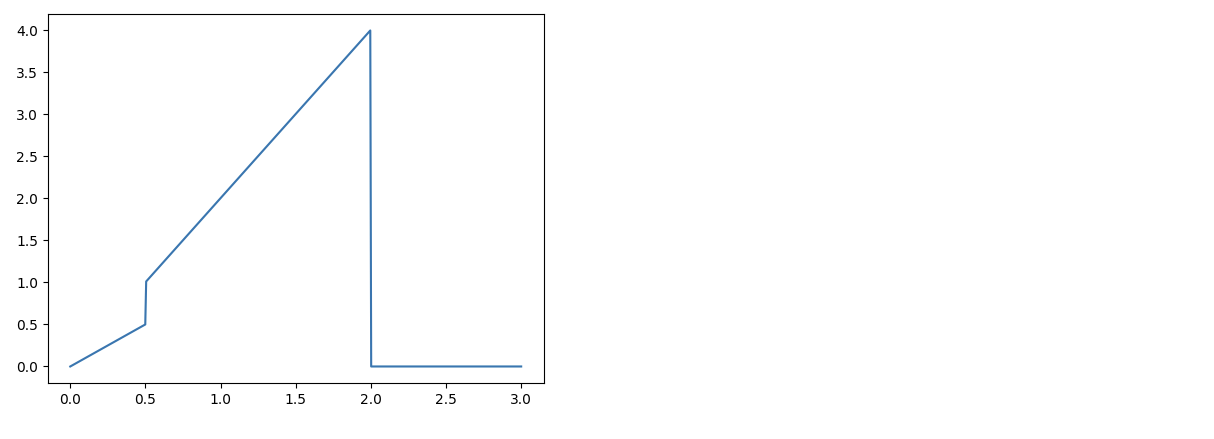

## Sous le capot de numpy



### Des données à plat

Peu importe la `shape` ou le `dtype` (=data_type): dans la mémoire, les tableaux `numpy` sont stockés sous la forme d'un tableau 1D, par octets (= des paquets de 8bits). Quand vous changez la `shape`, les données ne changent pas du tout, c'est uniquement la façon de les parcourir qui change.

In [ ]:
" ces 4 objets sont associés aux mêmes données toutes plates."
vec=np.arange(0,9,1)
print("vec\n",vec)
mat_square=vec.reshape([3,3])
print("mat_square\n",mat_square)
mat_col=mat_square.reshape([9,1])
print("mat_col\n",mat_col)
mat_line=mat_square.reshape([1,9])
print("mat_line\n",mat_line)

### L'attribut 'strides'

Quand on change la `shape`, on change aussi l'attribut `strides`: il indique comment on passe d'une case à l'autre.



### Exemple: vecteurs

Pour les vecteurs, `strides` est un tuple de taille 1: il indique de combien d'octets il faut glisser pour aller de `vec[i]` à `vec[i+1]`. Cela dépend uniquement du `dtype`.

In [ ]:
a=np.zeros(shape=5,dtype=np.uint8)
print("np.uint8, strides:",a.strides)
a=np.zeros(shape=5,dtype=np.int32)
print("np.int32, strides:",a.strides)
a = np.zeros(shape=5, dtype=np.int64)
print("np.int64, strides:",a.strides)

### Exo: matrices $\triangleright$

Dans le cas des matrices, `strides` est une paire.

* `strides[0]` indique de combien d'octets il faut glisser pour passer de la case `mat[i,j]` à la case `mat[i+1,j]`
* `strides[1]` indique de combien d'octets il faut glisser pour passer de la case ``mat[i,j]`` à la case ``mat[i,j+1]``

Illustrons cela avec uniquement `dtype=np.uint8`.

In [ ]:
a = np.zeros(shape=(2,4), dtype=np.uint8)
print("shape=(2,4), strides:", a.strides)

a = np.zeros(shape=(30, 5), dtype=np.uint8)
print("shape=(30,4), strides:", a.strides)

***A vous:*** Essayez de répondre à ces trois questions sans faire de `print` $(3\heartsuit)$, puis vérifiez avec un `print()`.

* Quel est le `strides` de `np.zeros(shape=(2,4), dtype=np.int32)` ?
* Quel est le `strides` de `np.zeros(shape=(30,5), dtype=np.int32)` ?
* À quoi correspond le `strides` d'un tenseur de dimension 3 ?

### Correction

* `np.zeros(shape=(2,4), dtype=np.int32)`<br>
Un `np.int32` occupe $4\times8$ bits donc il faut glisser de $4$ octets pour passer de la case `[i,j]` à la case `[i,j+1]`.<br>
Comme il y a 4 colonnes, la case `[i+1,j]` se situe $4$ cases après la case `[i,j]`, soit $4\times4 = 16$ octets après.<br>
Finalement, `strides = [16,4]` :


In [ ]:
a = np.zeros(shape=(2,4), dtype=np.int32)
print("shape:", a.shape, "| strides:", a.strides)


* `np.zeros(shape=(30,5), dtype=np.int32)`<br>
Comme précédemment, il faut glisser de $4$ octets pour passer de la case `[i,j]` à la case `[i,j+1]`.<br>
Il y a cette fois 5 colonnes, donc la case `[i+1,j]` se situe $5$ cases après la case `[i,j]`, soit $5\times4 = 20$ octets après.<br>
Finalement, `strides = [20,4]` :


In [ ]:
a = np.zeros(shape=(30,5), dtype=np.int32)
print("shape:", a.shape, "| strides:", a.strides)

* Pour un tenseur de dimension 3 :
 * `strides[0]`  indique de combien d'octets il faut glisser pour passer de la case `mat[i,j,k]` à la case `mat[i+1,j,k]`
 * `strides[1]`  indique de combien d'octets il faut glisser pour passer de la case `mat[i,j,k]` à la case `mat[i,j+1,k]`
 * `strides[2]`  indique de combien d'octets il faut glisser pour passer de la case `mat[i,j,k]` à la case `mat[i,j,k+1]`

 Par exemple :

In [ ]:
a = np.ones(shape=(2,4,6), dtype=np.uint8)
print("shape:", a.shape, "| strides:", a.strides)